In [58]:
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import seaborn as sns
from pandas import DataFrame, read_excel
from sklearn import preprocessing
from sklearn.cluster import KMeans

df = read_excel('data/iris-dataset.xls')

## Visual data analysis using Seaborn

Seaborn, statistical data visualization [**docs**](https://seaborn.pydata.org)

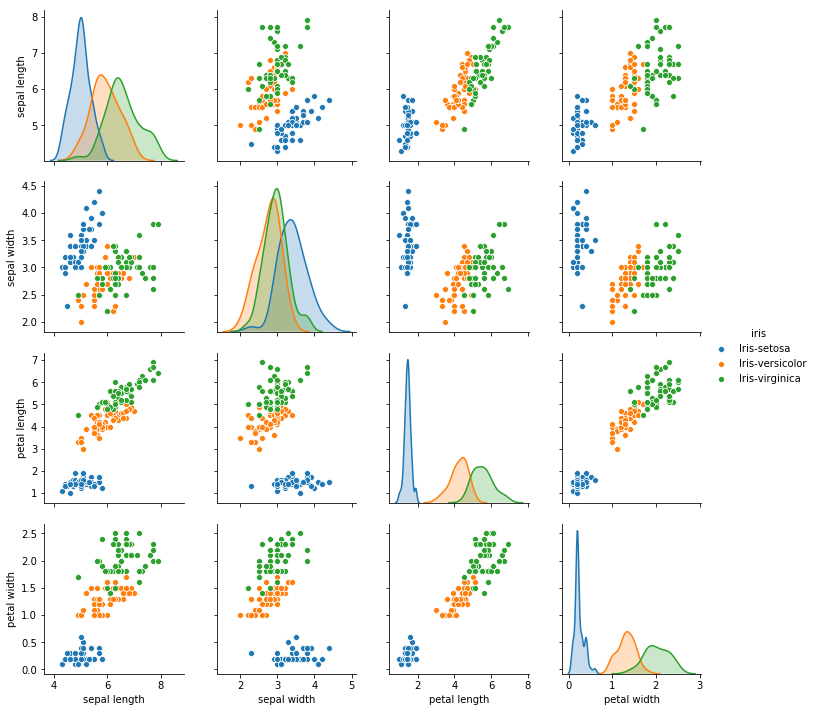

In [19]:
f1 = sns.pairplot(df, hue="iris")

In [32]:
# the data is unbalanced (eg sepallength ~4x petalwidth), so should do feature scaling,
# otherwise the larger features will dominate the others in clustering, etc.

scaler = preprocessing.StandardScaler()

features = df.iloc[:,0:4]
scaler.fit(features)
features_scaled_array = scaler.transform(features)
features_scaled = DataFrame(features_scaled_array, columns = features.columns)

## Species identification by clustering: k-means

In [53]:
estimator = KMeans(n_clusters=3)
estimator.fit(features_scaled_array)
df['kmeans'] = estimator.labels_

df.groupby(['iris','kmeans']).count()

sepal length  sepal width  petal length  petal width
iris            kmeans                                                      
Iris-setosa     1                 50           50            50           50
Iris-versicolor 0                 39           39            39           39
                2                 11           11            11           11
Iris-virginica  0                 14           14            14           14
                2                 36           36            36           36

## Species identification using PCA

explained variance ratio (first two components): [0.72770452 0.23030523]
      sepal length  sepal width  petal length  petal width
PC-1      0.522372    -0.263355      0.581254     0.565611
PC-2      0.372318     0.925556      0.021095     0.065416


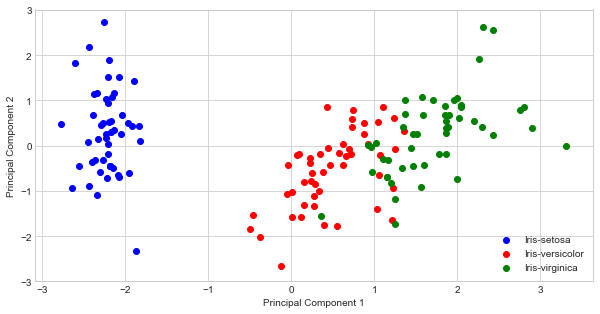

In [79]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Y_sklearn = pca.fit_transform(features_scaled_array)

print('explained variance ratio (first two components): {0}'.format(pca.explained_variance_ratio_))
print(DataFrame(pca.components_, columns=features.columns, index=['PC-1','PC-2']))

with plt.style.context('seaborn-whitegrid'):
    for lab, col in zip(df['iris'].unique(),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[df['iris']==lab, 0],
                    Y_sklearn[df['iris']==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower right')
    plt.show()

In [82]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, df['iris'])

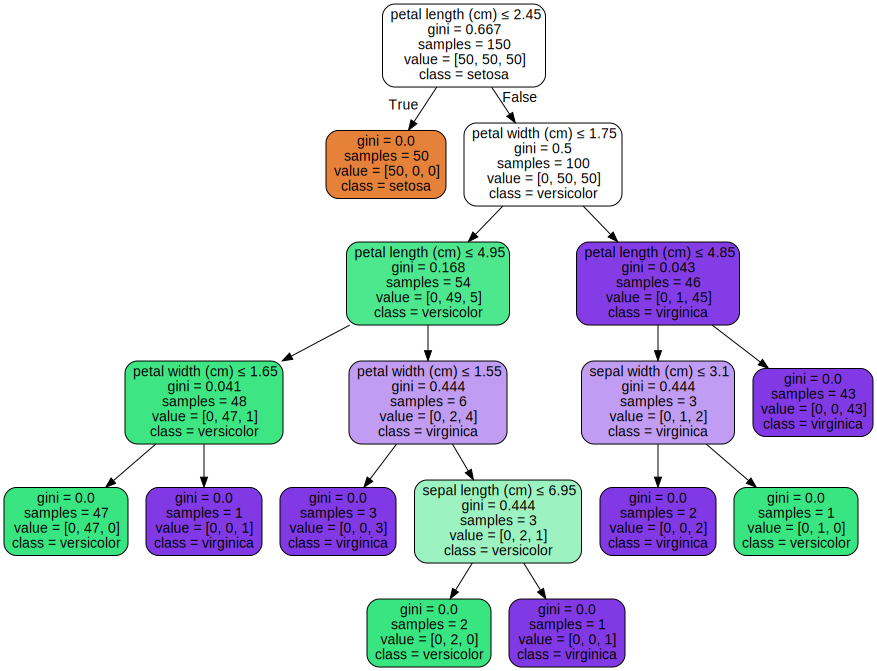

In [84]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graphviz.Source(dot_data)